In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/codesoft-task-2/IMDb Movies India.csv


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Importing Libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.base import clone
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score

# For seasonal decomposition and plots
from matplotlib import dates as mdates
import matplotlib.ticker as ticker

# Other useful libraries
import warnings
warnings.filterwarnings('ignore')

In [11]:
movie = pd.read_csv('/kaggle/input/codesoft-task-2/IMDb Movies India.csv', encoding='ISO-8859-1')
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [12]:
movie.shape

(15509, 10)

In [13]:
movie.info

<bound method DataFrame.info of                                      Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Votes

In [14]:
movie.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [15]:
movie.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [16]:
movie.drop_duplicates(subset='Name',inplace=True)
movie.duplicated().value_counts()

False    13838
Name: count, dtype: int64

In [17]:
movie = movie.drop(movie.index[0]).reset_index(drop=True)
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
4,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [18]:
movie.isnull().sum().sort_values(ascending=False)/len(movie)

Duration    0.523090
Rating      0.483053
Votes       0.482980
Actor 3     0.202717
Actor 2     0.154080
Genre       0.114909
Actor 1     0.103997
Year        0.035918
Director    0.033606
Name        0.000000
dtype: float64

In [19]:
print("Number of rows:", movie.shape[0])
print("Number of columns:", movie.shape[1])

Number of rows: 13837
Number of columns: 10


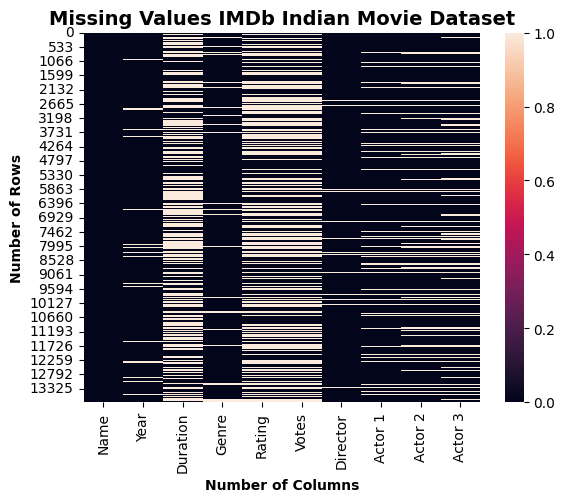

In [20]:
sns.heatmap(movie.isnull())

# Plot Title
plt.title("Missing Values IMDb Indian Movie Dataset",
          fontsize=14,
          fontweight='bold')

# Title for x and y-axis labels with formatting
plt.xlabel("Number of Columns",
           fontweight='bold')
plt.ylabel("Number of Rows",
           fontweight='bold')
plt.show()

In [21]:
movie.drop_duplicates(inplace=True)
movie.shape

(13837, 10)

In [22]:
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
4,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [23]:
movie.isnull().sum()

Name           0
Year         497
Duration    7238
Genre       1590
Rating      6684
Votes       6683
Director     465
Actor 1     1439
Actor 2     2132
Actor 3     2805
dtype: int64

In [24]:
missing_count = movie.isnull().sum().sort_values(ascending=False)
missing_percent = (round(movie.isnull().sum()/movie.isnull().count(), 4)*100).sort_values(ascending=False)
missing_data = pd.concat([missing_count, missing_percent],
                       axis=1,
                       keys=['missing_count', 'missing_percent'])
missing_data

,missing_count,missing_percent
Duration,7238,52.31
Rating,6684,48.31
Votes,6683,48.30
Actor 3,2805,20.27
Actor 2,2132,15.41
Genre,1590,11.49
Actor 1,1439,10.40
Year,497,3.59
Director,465,3.36
Name,0,0.00


In [25]:
movie.dropna(subset=['Rating'], inplace=True)
(round(movie.isnull().sum()/movie.isnull().count(), 4)*100).sort_values(ascending=False)


Duration    25.43
Actor 3      3.89
Actor 2      2.66
Actor 1      1.66
Genre        1.20
Director     0.04
Name         0.00
Year         0.00
Rating       0.00
Votes        0.00
dtype: float64

In [26]:
movie.isnull().sum()

Name           0
Year           0
Duration    1819
Genre         86
Rating         0
Votes          0
Director       3
Actor 1      119
Actor 2      190
Actor 3      278
dtype: int64

In [ ]:
movie.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

(round(movie.isnull().sum()/movie.isnull().count(), 4)*100).sort_values(ascending=False)

In [ ]:
movie['Duration'] = movie['Duration'].astype(str)
movie['Duration'] = pd.to_numeric(movie['Duration'].str.replace(' min', ''), errors='coerce')
movie['Duration'].fillna(movie['Duration'].mean(), 
                         inplace=True)

movie.isnull().sum()

In [27]:
movie.shape

(7153, 10)

In [29]:
movie['Year'] = movie['Year'].apply(lambda x: x.split(')')[0])

year_lst = []
for val in movie['Year']:
    if len(val.split('(')) == 1:
        year_lst.append(val.split('(')[0])
    elif len(val.split('(')) > 1:
        year_lst.append(val.split('(')[1])
movie['Year'] = year_lst

In [30]:
print(movie['Votes'].dtype)

# If it's not already a string, convert it to string with commas
movie['Votes'] = movie['Votes'].astype(str)

# Replace commas and convert to int
movie['Votes'] = movie['Votes'].str.replace(',', '').astype(int)

# Check the data type after conversion
print(movie['Votes'].dtype)

object
int64


In [31]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7153 entries, 0 to 13836
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7153 non-null   object 
 1   Year      7153 non-null   object 
 2   Duration  5334 non-null   object 
 3   Genre     7067 non-null   object 
 4   Rating    7153 non-null   float64
 5   Votes     7153 non-null   int64  
 6   Director  7150 non-null   object 
 7   Actor 1   7034 non-null   object 
 8   Actor 2   6963 non-null   object 
 9   Actor 3   6875 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 614.7+ KB


In [32]:
movie['Year'].unique()

array(['2019', '1997', '2005', '2012', '2014', '2004', '2016', '1991',
       '2018', '2010', '1958', '2017', '2009', '1993', '2002', '1946',
       '2008', '1994', '2007', '2013', '2003', '1998', '1979', '1951',
       '1956', '1974', '2015', '2006', '1981', '2020', '1985', '2011',
       '1967', '1988', '1995', '1987', '2021', '1996', '1999', '1973',
       '1953', '1943', '1986', '1982', '1977', '1968', '1969', '1948',
       '1970', '1990', '1989', '1947', '2001', '2000', '1971', '1935',
       '1992', '1976', '1984', '1975', '1978', '1980', '1966', '1972',
       '1964', '1952', '1959', '1957', '1954', '1962', '1961', '1965',
       '1933', '1936', '1983', '1955', '1950', '1963', '1932', '1949',
       '1960', '1940', '1945', '1938', '1941', '1942', '1937', '1934',
       '1944', '1931', '1939', '1917'], dtype=object)

In [33]:
movie[['Rating', 'Duration', 'Votes']].describe()

,Rating,Votes
count,7153.000000,7153.000000
mean,5.853125,2008.938767
std,1.389741,12088.352726
min,1.100000,5.000000
25%,4.900000,17.000000
50%,6.000000,58.000000
75%,6.900000,438.000000
max,10.000000,591417.000000


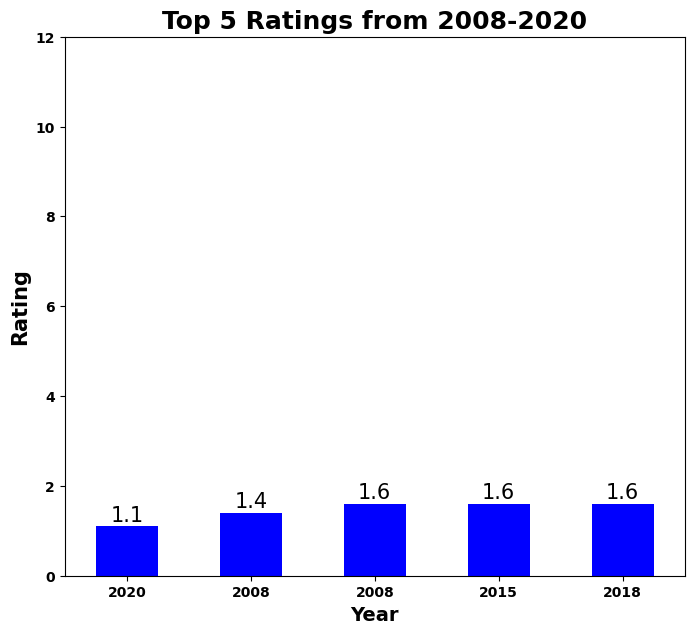

In [34]:

top5_rating = movie[['Year', 'Rating']].sort_values(by = 'Rating',
                                                    ascending = True).head()
bars = top5_rating.plot(kind = 'bar',
                        x = 'Year',
                        y = 'Rating',
                        color = 'blue',
                        legend = None,
                        figsize = (8,7))
plt.xlabel('Year',
           fontsize = 14,
           fontweight = 'bold')
plt.ylabel('Rating',
           fontsize = 15,
           fontweight = 'bold')
plt.title('Top 5 Ratings from 2008-2020',
          fontsize = 18,
          fontweight = 'bold')
plt.xticks(fontweight = 'bold',
           rotation = 0)
plt.yticks(np.arange(0, 13, 2), fontweight='bold')

#Labelling Plot
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.1f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center',
                 va='center',
                 size=15,
                 xytext=(0, 8),
                 textcoords='offset points')

plt.show()

In [38]:
movie[movie['Votes']>10000]

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
51,2 States,2014,"Comedy, Drama, Romance",6.9,24034,Abhishek Varman,Arjun Kapoor,Alia Bhatt,Amrita Singh
52,2.0,2018,"Action, Sci-Fi",6.2,21938,S. Shankar,Rajinikanth,Akshay Kumar,Amy Jackson
73,3 Idiots,2009,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
169,A Wednesday,2008,"Action, Crime, Drama",8.1,75118,Neeraj Pandey,Anupam Kher,Naseeruddin Shah,Jimmy Sheirgill
346,Aamir,2008,"Action, Crime, Drama",7.7,10862,Raj Kumar Gupta,Rajeev Khandelwal,Aishwarya,Vasan Bala
...,...,...,...,...,...,...,...,...,...
13430,When Love Calls,1989,"Drama, Musical, Romance",7.3,11486,Sooraj R. Barjatya,Salman Khan,Bhagyashree,Alok Nath
13614,Yeh Jawaani Hai Deewani,2013,"Drama, Musical, Romance",7.1,39863,Ayan Mukherjee,Ranbir Kapoor,Deepika Padukone,Aditya Roy Kapoor
13666,Yes Boss,1997,"Comedy, Drama, Musical",6.8,12714,Aziz Mirza,Shah Rukh Khan,Juhi Chawla,Aditya Pancholi
13770,Zero,2018,"Comedy, Drama, Romance",5.4,24784,Aanand L. Rai,Shah Rukh Khan,Anushka Sharma,Katrina Kaif


In [39]:
movie.shape

(7153, 9)

In [41]:
movie_update = movie.drop(['Name'], axis=1)

In [42]:
movie_update.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7153 entries, 0 to 13836
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      7153 non-null   object 
 1   Genre     7067 non-null   object 
 2   Rating    7153 non-null   float64
 3   Votes     7153 non-null   int64  
 4   Director  7150 non-null   object 
 5   Actor 1   7034 non-null   object 
 6   Actor 2   6963 non-null   object 
 7   Actor 3   6875 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 502.9+ KB


In [43]:
X = movie_update.drop('Rating', axis=1)
Y = movie_update['Rating']

X.head()

,Year,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,2019,Drama,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,2019,"Comedy, Romance",35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,1997,"Comedy, Drama, Musical",827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,2005,"Drama, Romance, War",1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,2012,"Horror, Mystery, Thriller",326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [45]:
actor1_encoding_map = movie_update.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()
actor2_encoding_map = movie_update.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()
actor3_encoding_map = movie_update.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()
director_encoding_map = movie_update.groupby('Director').agg({'Rating': 'mean'}).to_dict()
genre_encoding_map = movie_update.groupby('Genre').agg({'Rating': 'mean'}).to_dict()

In [46]:
movie_update['actor1_encoded'] = round(movie_update['Actor 1'].map(actor1_encoding_map['Rating']),1)
movie_update['actor2_encoded'] = round(movie_update['Actor 2'].map(actor2_encoding_map['Rating']),1)
movie_update['actor3_encoded'] = round(movie_update['Actor 3'].map(actor3_encoding_map['Rating']),1)
movie_update['director_encoded'] = round(movie_update['Director'].map(director_encoding_map['Rating']),1)
movie_update['genre_encoded'] = round(movie_update['Genre'].map(genre_encoding_map['Rating']),1)

In [47]:
movie_update.drop(['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1, inplace=True)
movie_update.head()

,Year,Rating,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
0,2019,7.0,8,6.8,7.0,7.0,7.0,6.4
2,2019,4.4,35,5.4,4.4,4.4,4.4,5.7
4,1997,4.7,827,4.9,5.8,6.0,5.3,6.2
5,2005,7.4,1086,5.3,6.0,6.5,7.5,7.4
7,2012,5.6,326,5.6,5.9,5.6,5.6,5.5


In [49]:
X= movie_update[['Year', 'Votes', 'genre_encoded', 'director_encoded', 'actor1_encoded', 'actor2_encoded', 'actor3_encoded']]
y= movie_update['Rating']

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)